
## Implementation of code


# I have used SHAP Algorithm and implemented it in code.

### Let us import the necessary liabraries and read our DataSet

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let us import our Data Set


In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
df= pd.read_csv("/content/drive/MyDrive/Heart Prediction/Data/heart.csv")

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Analysis

### Understanding our DataSet:

#### Age : Age of the patient

#### Sex : Sex of the patient

#### exang: exercise induced angina (1 = yes; 0 = no)

#### ca: number of major vessels (0-3)

#### cp : Chest Pain type chest pain type

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

#### trtbps : resting blood pressure (in mm Hg)

#### chol : cholestoral in mg/dl fetched via BMI sensor

#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#### rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### thalach : maximum heart rate achieved

#### target : 0= less chance of heart attack 1= more chance of heart attack

In [8]:
df.shape

(303, 14)

In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


<Axes: >

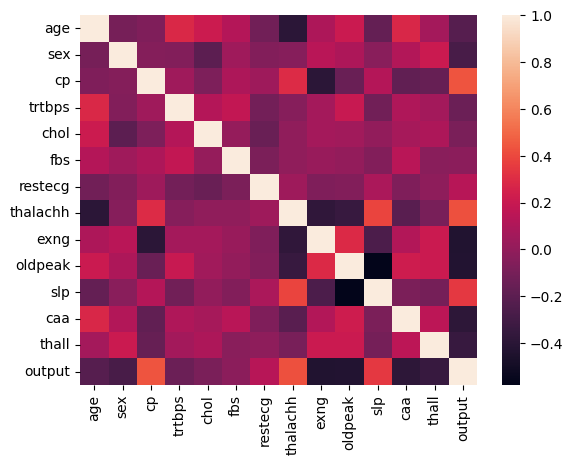

In [10]:
sns.heatmap(df.corr())  #function in Seaborn is used to visualize the correlation matrix of a DataFrame. It creates a heatmap where each cell's color represents the correlation between two variables.

#### As we can see our variables are not highly correlated to each other

<Axes: title={'center': 'Age of Patients'}, xlabel='Age', ylabel='count'>

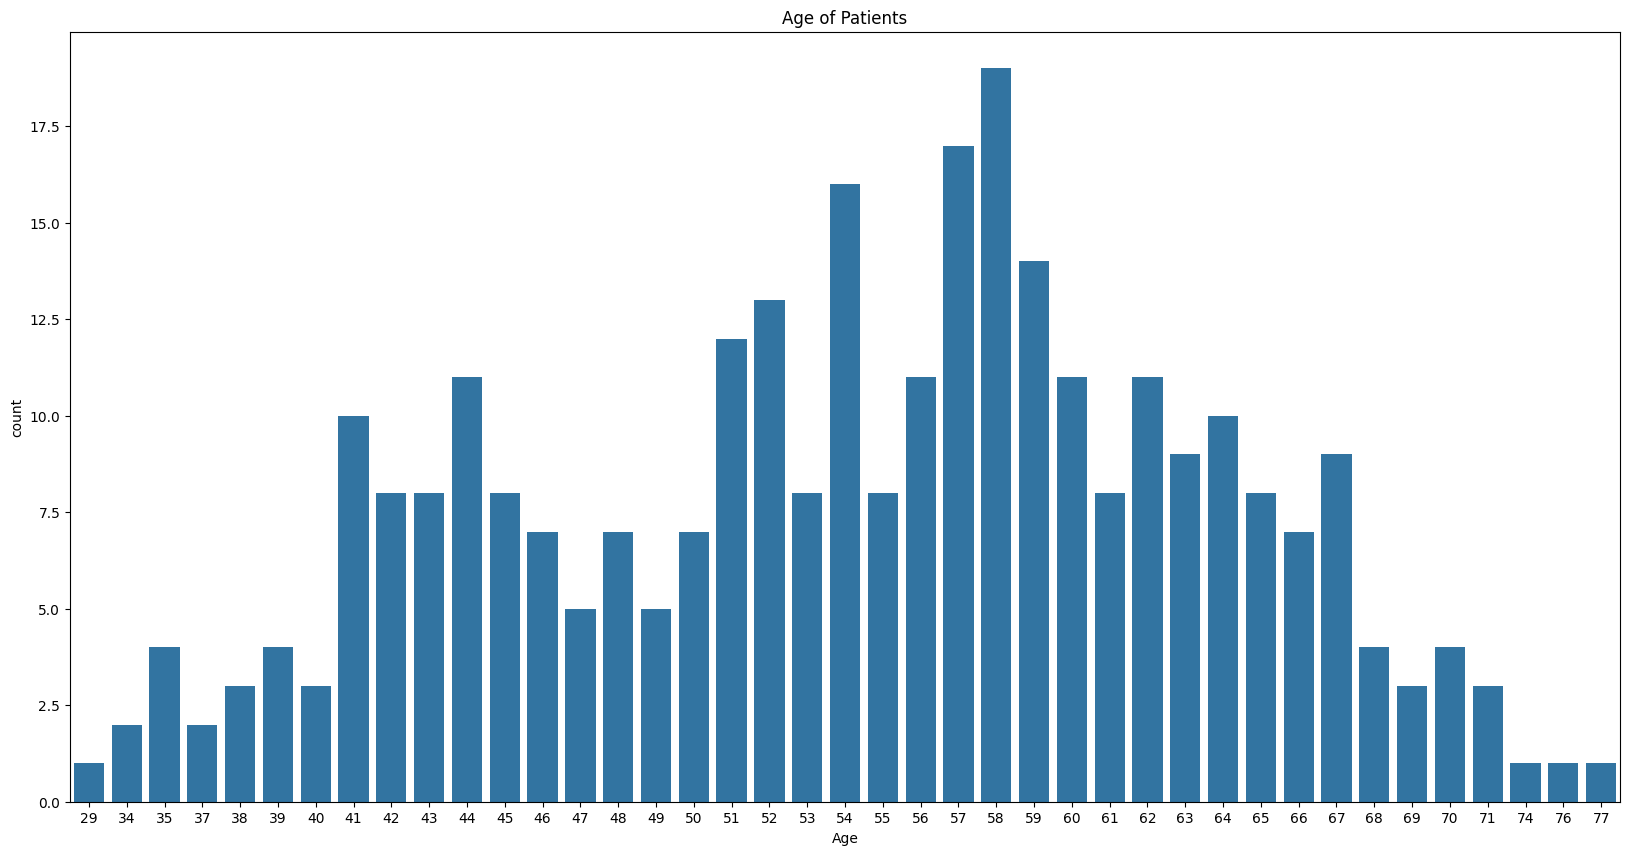

In [11]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)

#### As we can see the Patients are of Age Group 51-67years in majority

<Axes: title={'center': 'Sex of Patients,0=Female and 1=Male'}, xlabel='sex', ylabel='count'>

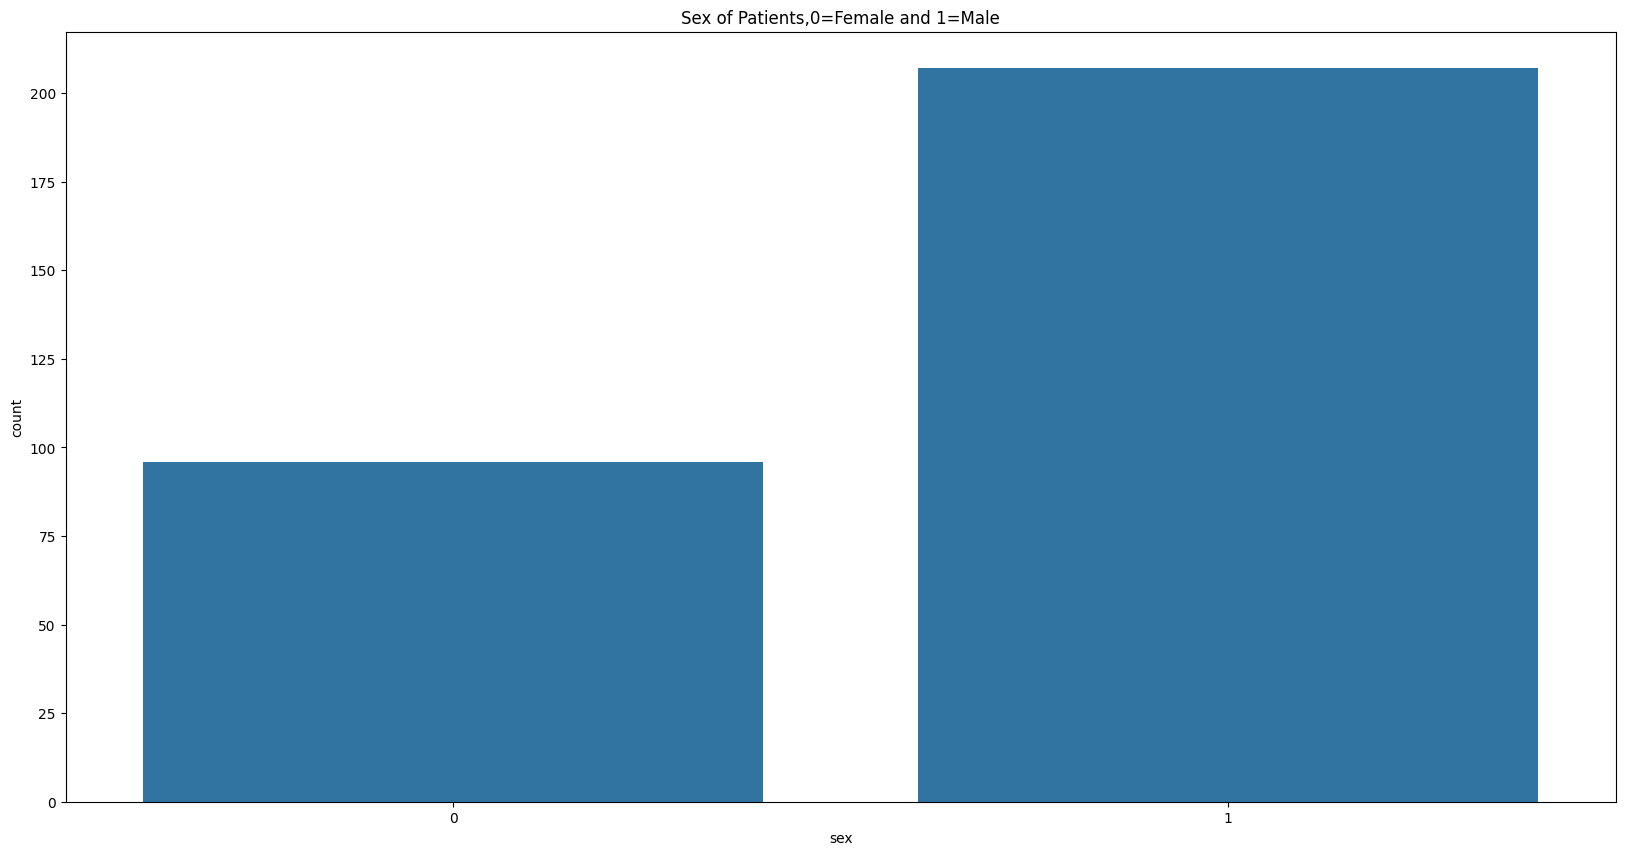

In [12]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='sex',data=df)

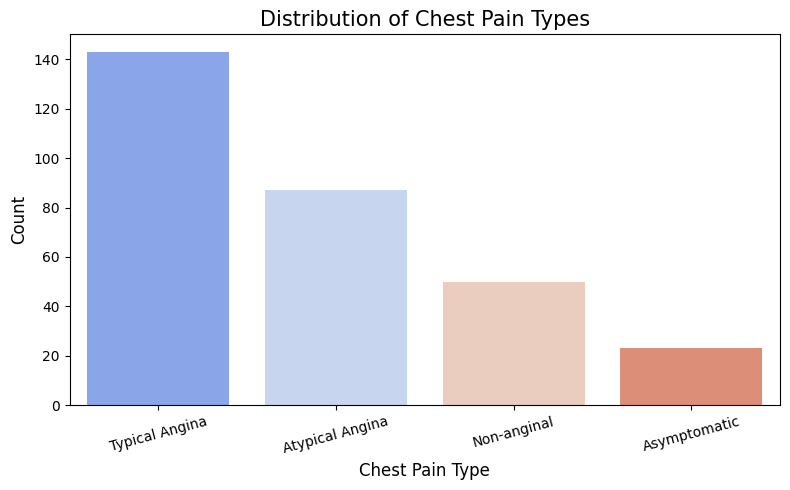

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {'cp_type': ['Typical Angina', 'Atypical Angina', 'Non-anginal', 'Asymptomatic'],
        'count': [143, 87, 50, 23]}
cp_df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='cp_type', y='count', data=cp_df, hue='cp_type', palette='coolwarm', dodge=False, legend=False)

# Labels and Title
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Chest Pain Types', fontsize=15)
plt.xticks(rotation=15)
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
cp_data = df['cp'].value_counts().reset_index()
cp_data.rename(columns={'index': 'cp_type'}, inplace=True)
cp_data.loc[3, 'cp_type'] = 'Asymptomatic'  # Row with index 3
cp_data.loc[2, 'cp_type'] = 'Non-anginal'   # Row with index 2
cp_data.loc[1, 'cp_type'] = 'Atypical Angina' # Row with index 1
cp_data.loc[0, 'cp_type'] = 'Typical Angina'  # Row with index 0
cp_data

,cp,count,cp_type
0,0,143,Typical Angina
1,2,87,Atypical Angina
2,1,50,Non-anginal
3,3,23,Asymptomatic


#### We have seen how the the Chest Pain Category is distributed

In [15]:
ecg_data = df['restecg'].value_counts().reset_index()
ecg_data.rename(columns={'index': 'ecg_type'}, inplace=True)

# Access and modify rows using .loc with index values
ecg_data.loc[0, 'ecg_type'] = 'normal'
ecg_data.loc[1, 'ecg_type'] = 'having ST-T wave abnormality'
ecg_data.loc[2, 'ecg_type'] = 'showing probable or definite left ventricular hypertrophy by Estes'

ecg_data

,restecg,count,ecg_type
0,1,152,normal
1,0,147,having ST-T wave abnormality
2,2,4,showing probable or definite left ventricular ...


#### This is our ECG Data

#### We have done the Analysis of the data

In [16]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Let us split our data

In [17]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1:]

In [18]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [40]:
lbl= LabelEncoder()

In [41]:
encoded_y= lbl.fit_transform(y_train.values.ravel())

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [43]:
encoded_ytest= lbl.fit_transform(y_test.values.ravel())

In [26]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [44]:
logreg = LogisticRegression(max_iter=1500)
logreg.fit(x_train, encoded_y)
Y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1)
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

In [45]:
lr_acc_score

0.8571428571428571

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf= RandomForestClassifier()

In [31]:
rf.fit(x_train,encoded_y)

RandomForestClassifier()

In [32]:
ypred3 = rf.predict(x_test)

In [33]:
rf_conf_matrix = confusion_matrix(encoded_ytest,ypred3)
rf_acc_score = accuracy_score(encoded_ytest, ypred3)

In [34]:
rf_conf_matrix

array([[32, 12],
       [ 8, 39]])

In [35]:
rf_acc_score

0.7802197802197802

In [46]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

AUC: 0.8551740812379109


#IMPLEMENTING SHAP TECHNIQUE IN MY MODEL
   I have  started with SHAP (SHapley Additive exPlanations) due to its effectiveness in providing global and local interpretability for complex machine learning models. SHAP values can help you understand the contribution of each feature to the model's predictions and identify which features are most influential in determining the risk of a heart attack.

In [52]:
!pip install shap

Model Predictions: SHAP values are calculated to explain the output of a machine learning model. In order to compute SHAP values, the model needs to be trained and capable of making predictions on new data.

Feature Importance: SHAP values help in understanding the contribution of each feature to the model's predictions. Without a trained model, there are no predictions to explain, and therefore no feature importance values can be computed.

In [57]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(model, x_train)
#x_train is The training data used to train the model.
shap_values = explainer.shap_values(x_test, check_additivity=False)
#shap_values = explainer.shap_values(x_test, check_additivity=False): This line calculates the SHAP values for a sample of the test data (x_test).
#It computes the impact of each feature on the model's predictions for the given test data.

# Check the shape of x_train and x_test
print("Shape of x_train:", x_train.shape) #printing the shape or dimension of data
print("Shape of x_test:", x_test.shape)

# Ensure that x_test has the same columns as x_train
assert x_test.columns.tolist() == x_train.columns.tolist(), "Columns of x_test and x_train do not match"


Shape of x_train: (212, 13)
Shape of x_test: (91, 13)


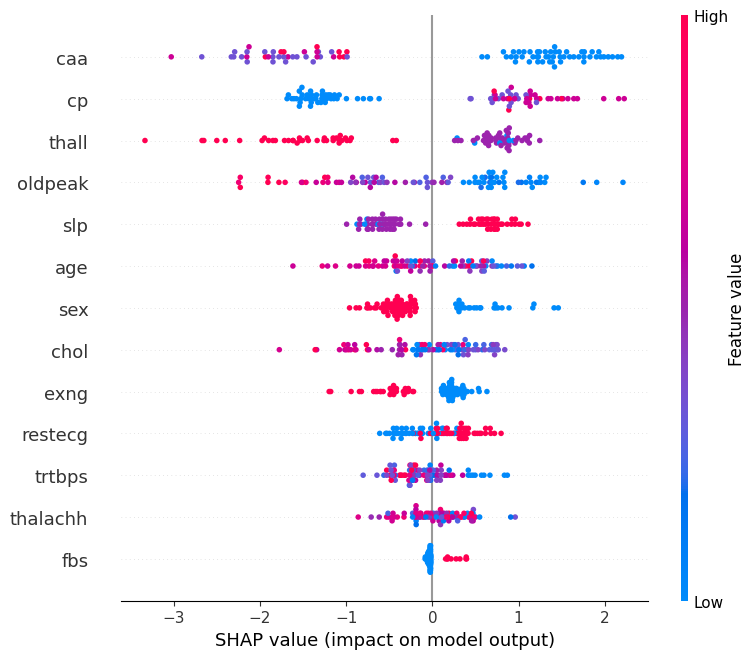

In [58]:
# # Visualize SHAP summary plot
shap.summary_plot(shap_values, x_test, feature_names=x.columns)

Breakdown of the different elements in the graph:

Features: The x-axis represents the feature values for sex and the y-axis represents the feature values for age.
SHAP interaction values: The color represents the SHAP interaction value, which indicates how much the combined effect of sex and age differs from the sum of their individual effects. Red colors indicate a positive interaction effect, where the features amplify each other’s impact on the model’s prediction. Blue colors indicate a negative interaction effect, where the features weaken each other’s impact.
Colorbar: The colorbar on the right shows the range of SHAP interaction values.

Shape of x_train: (212, 13)
Shape of x_test: (91, 13)


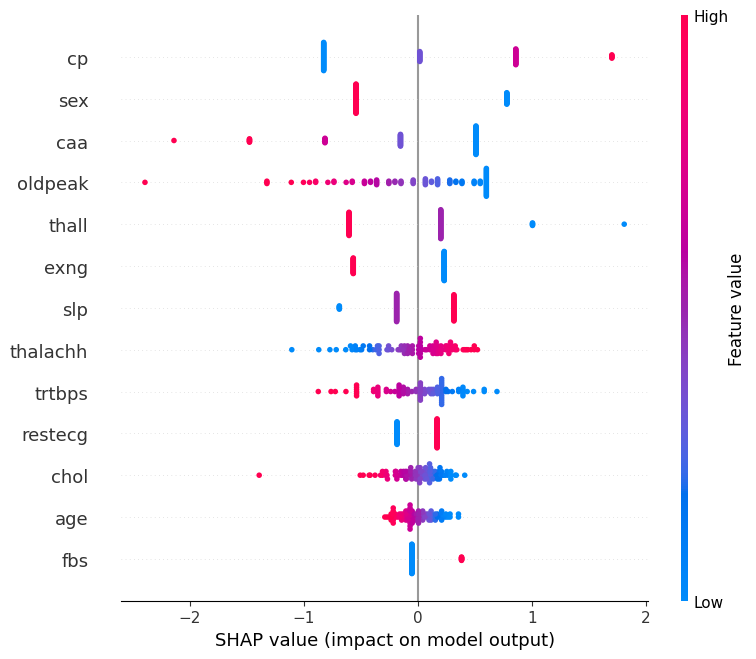

In [56]:
# Create a SHAP explainer object
explainer = shap.Explainer(logreg, x_train)

# Calculate SHAP values for a sample of the data
shap_values = explainer.shap_values(x_test)

print("Shape of x_train:", x_train.shape) #printing the shape or dimension of data
print("Shape of x_test:", x_test.shape)
# Visualize SHAP summary plot
shap.summary_plot(shap_values, x_test, feature_names=x.columns)

In [73]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

class ShapCounterfactualAnalysis:
    def __init__(self, data, model, feature_to_analyze='cp'):
        """
        Initialize the counterfactual analysis

        Parameters:
        - data: Original DataFrame
        - model: Trained logistic regression model
        - feature_to_analyze: Feature to perform counterfactual analysis on
        """
        self.data = data
        self.model = model
        self.feature_to_analyze = feature_to_analyze

        # Preprocess data
        self.scaler = StandardScaler()

        # Separate features and target
        self.X = data.drop('output', axis=1)

        # Scale numerical features
        numerical_features = self.X.select_dtypes(include=['int64', 'float64']).columns
        self.X_scaled = self.X.copy()
        self.X_scaled[numerical_features] = self.scaler.fit_transform(self.X[numerical_features])

    def perform_counterfactual_analysis(self,
                                        original_category=3,
                                        counterfactual_category=2):
        """
        Perform counterfactual analysis for a specific feature

        Parameters:
        - original_category: Original category value
        - counterfactual_category: Category to change to

        Returns:
        - Visualization of SHAP values for original and counterfactual instances
        """
        # Select instance with original category
        try:
            instance_index = self.data[self.data[self.feature_to_analyze] == original_category].index[0]
        except IndexError:
            print(f"No instance found with {self.feature_to_analyze} category {original_category}")
            return

        # Create original and counterfactual instances
        original_instance = self.X_scaled.iloc[instance_index].copy()
        counterfactual_instance = original_instance.copy()

        # Change the feature category
        counterfactual_instance[self.feature_to_analyze] = counterfactual_category

        # Create SHAP explainer
        explainer = shap.Explainer(self.model, self.X_scaled)

        # Calculate SHAP values
        original_shap = explainer(original_instance.values.reshape(1, -1))
        counterfactual_shap = explainer(counterfactual_instance.values.reshape(1, -1))

        # Visualize original instance
        plt.figure(figsize=(15, 6))  # Larger width for better clarity
        shap.plots.force(
            base_value=explainer.expected_value,
            shap_values=original_shap.values[0],
            features=original_instance,
            matplotlib=True,
            show=False
        )
        plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
        plt.title(f"SHAP Force Plot: Original Instance (Category {original_category})", fontsize=14)
        plt.show()

        # Visualize counterfactual instance
        plt.figure(figsize=(15, 6))  # Adjusted figure size
        shap.plots.force(
            base_value=explainer.expected_value,
            shap_values=counterfactual_shap.values[0],
            features=counterfactual_instance,
            matplotlib=True,
            show=False
        )
        plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
        plt.title(f"SHAP Force Plot: Counterfactual Instance (Category {counterfactual_category})", fontsize=14)
        plt.tight_layout(pad=2)
        plt.show()

        # Comparative analysis
        print("Comparative SHAP Value Analysis:")
        print(f"Original Instance SHAP Value: {original_shap.values[0]}")
        print(f"Counterfactual Instance SHAP Value: {counterfactual_shap.values[0]}")

        return original_shap, counterfactual_shap

# Example Usage
def run_counterfactual_analysis(df, logreg):
    """
    Run counterfactual analysis with error handling
    """
    try:
        # Prepare features and target
        X = df.drop('output', axis=1)

        # Scale numerical features
        numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
        scaler = StandardScaler()
        X_scaled = X.copy()
        X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])

        # Create counterfactual analysis object
        counterfactual_analyzer = ShapCounterfactualAnalysis(
            data=df,
            model=logreg
        )

        # Perform counterfactual analysis
        counterfactual_analyzer.perform_counterfactual_analysis(
            original_category=3,  # Asymptomatic
            counterfactual_category=2  # Non-anginal
        )

    except Exception as e:
        print(f"An error occurred: {e}")
        print("Please ensure:")
        print("1. The model is trained")
        print("2. The dataset contains the specified feature")
        print("3. The SHAP library is correctly installed")


<Figure size 1500x600 with 0 Axes>

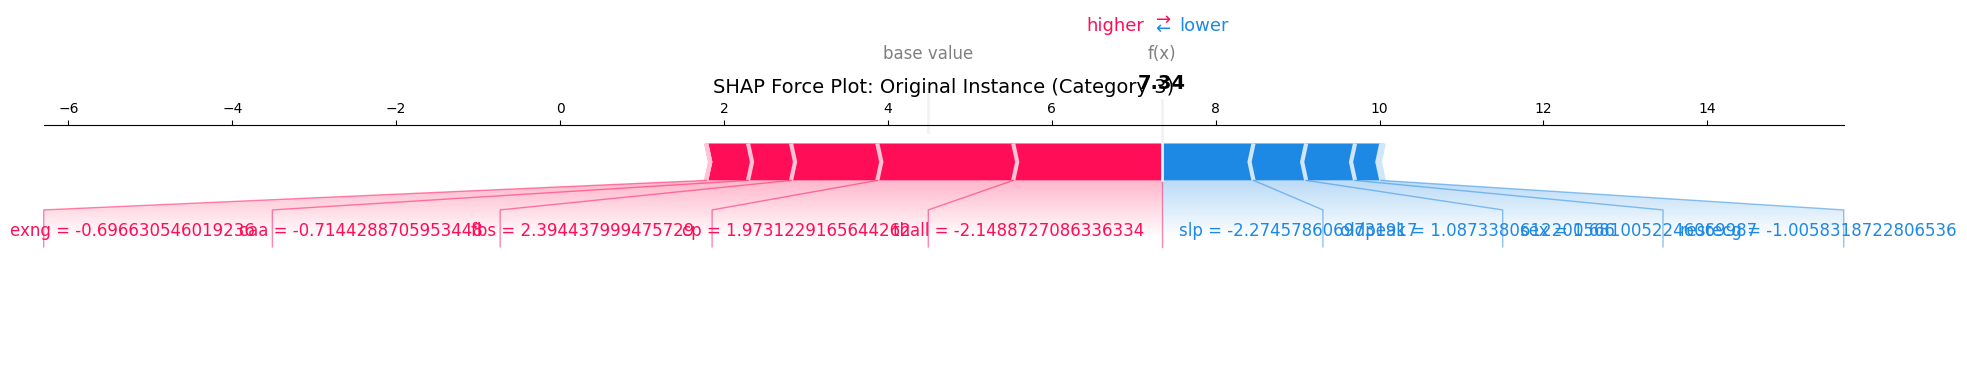

<Figure size 1500x600 with 0 Axes>

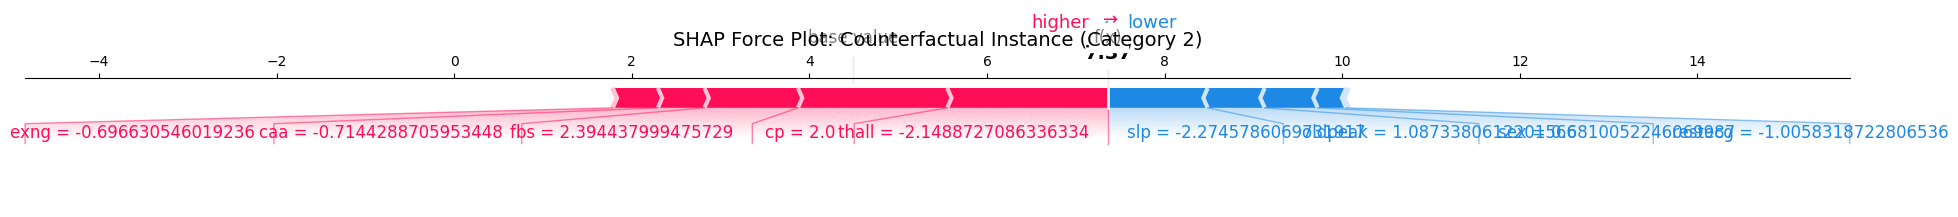

Comparative SHAP Value Analysis:
Original Instance SHAP Value: [-1.75117919e-02 -5.96439847e-01  1.65813513e+00 -1.29756151e-02
  8.47798547e-04  1.05255085e+00 -3.20808685e-01  1.03956929e-03
  5.09637503e-01 -6.42309411e-01 -1.11799047e+00  5.24811718e-01
  1.81453533e+00]
Counterfactual Instance SHAP Value: [-1.75117919e-02 -5.96439847e-01  1.68075499e+00 -1.29756151e-02
  8.47798547e-04  1.05255085e+00 -3.20808685e-01  1.03956929e-03
  5.09637503e-01 -6.42309411e-01 -1.11799047e+00  5.24811718e-01
  1.81453533e+00]


In [74]:
run_counterfactual_analysis(df, logreg)

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Heart Prediction/Heart Attack Prediction.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Heart Prediction/Heart Attack Prediction.ipynb to html
[NbConvertApp] Writing 957750 bytes to /content/drive/MyDrive/Heart Prediction/Heart Attack Prediction.html
